#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**

## **Implement LSTM with stock market dataset.**

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# Step 1: Load the Data
data = yf.download("TCS.NS", start="2020-01-01", end="2023-01-01")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  2168.000000  2183.899902  2154.000000  2167.600098  1980.292603   
2020-01-02  2179.949951  2179.949951  2149.199951  2157.649902  1971.202393   
2020-01-03  2164.000000  2223.000000  2164.000000  2200.649902  2010.486694   
2020-01-06  2205.000000  2225.949951  2187.899902  2200.449951  2010.304077   
2020-01-07  2200.500000  2214.649902  2183.800049  2205.850098  2015.237793   

             Volume  
Date                 
2020-01-01  1354908  
2020-01-02  2380752  
2020-01-03  4655761  
2020-01-06  3023209  
2020-01-07  2429317  


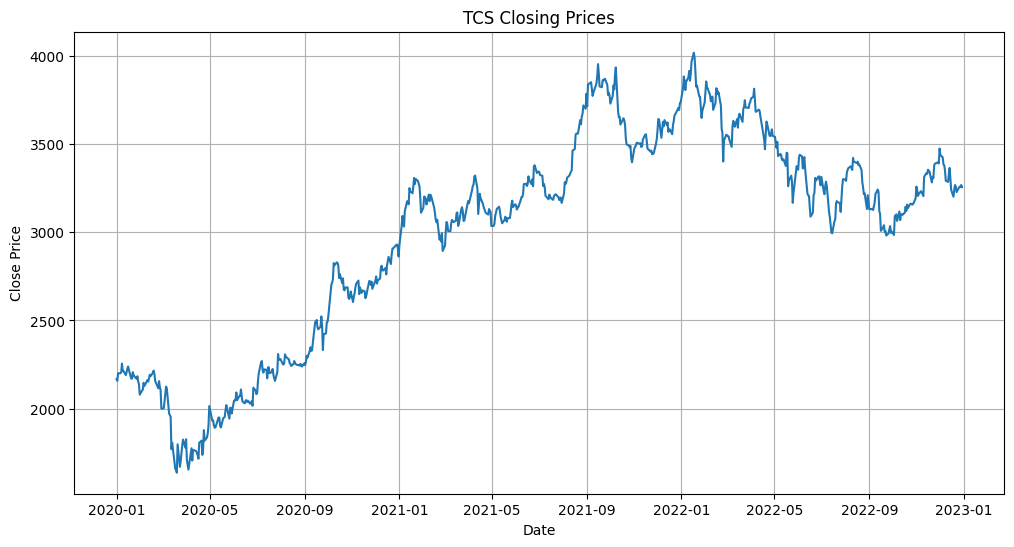

In [ ]:
# Step 2: Plot the Closing Price
plt.figure(figsize=(12, 6))
plt.plot(data["Close"])
plt.title("TCS Closing Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()

In [ ]:
# Step 3: Preprocess the Data
data = data[["Close"]]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

# Create the training data
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Step 5: Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")

# Step 6: Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


538/538 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - loss: 0.0376


In [ ]:
# Step 7: Create the Testing Data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [ ]:
# Step 8: Make Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


<ipython-input-8-f176fb737f87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


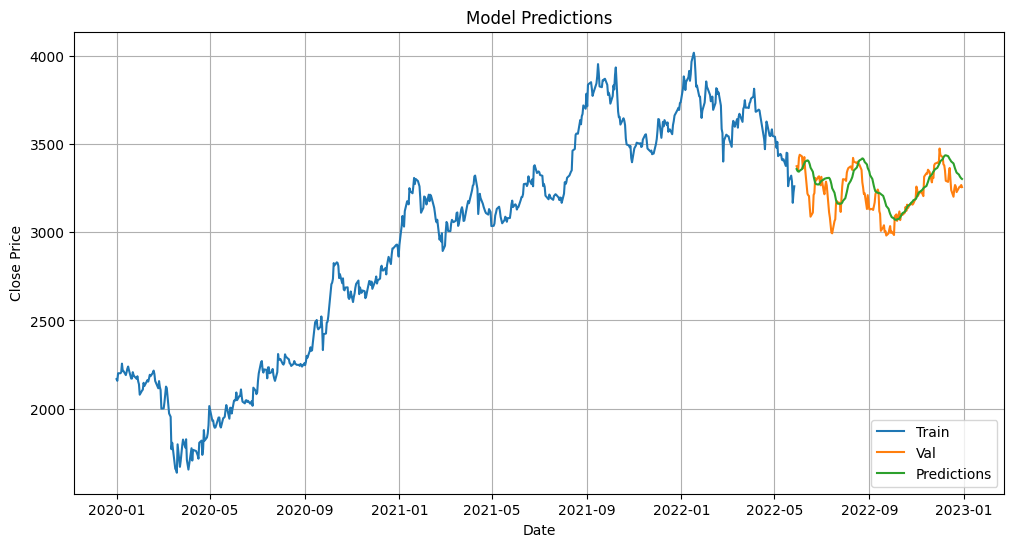

In [ ]:
# Step 9: Plot the Results
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

plt.figure(figsize=(12, 6))
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.title("Model Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.grid()
plt.show()



In [ ]:
# Step 10: Evaluate the Model
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 46.88067749842701
